## Importing Librarires.

In [167]:
## Importing the necessary packages.
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [168]:
## Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

## Reading and Understanding the csv file.

In [169]:
lap_data= pd.read_csv(r"C:\Users\Rushab\Documents\Kalpatru_project\laptop_pricing.csv")

In [170]:
## Analyzing the fiest 10 rows of the dataframe.
lap_data.head(30)

,Manufacturer,IntelCore(i-),IntelCoreGen,processing speed(GHz),Ram(gb),HDD(gb),SSD(gb),Graphics(gb),ScreenSize(inch),Price
0,Dell,3,7,2.29,4,1000,0,0,15.6,39057
1,Dell,3,7,2.30,4,1000,0,0,15.6,45141
2,HP,3,7,2.30,8,256,256,0,14.0,35999
3,ASUS,3,7,2.30,4,1000,0,0,14.0,39990
4,HP,3,7,2.40,4,1000,0,0,15.6,36263
5,HP,2,4,2.30,4,500,256,0,14.0,26403
6,Lenovo,3,7,2.30,4,1000,0,0,15.6,38290
7,HP,5,8,1.60,8,1000,0,0,14.0,53554
8,Lenovo,1,3,1.80,4,1000,0,0,15.6,29990
9,Dell,3,8,3.90,4,1000,0,0,14.0,38090


In [171]:
## Checking the shape of the dataframe.
lap_data.shape

(29, 10)

In [172]:
## Checking the datatype and null value precense in the dataframe.
lap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Manufacturer           29 non-null     object 
 1   IntelCore(i-)          29 non-null     int64  
 2   IntelCoreGen           29 non-null     int64  
 3   processing speed(GHz)  29 non-null     float64
 4   Ram(gb)                29 non-null     int64  
 5   HDD(gb)                29 non-null     int64  
 6   SSD(gb)                29 non-null     int64  
 7   Graphics(gb)           29 non-null     int64  
 8   ScreenSize(inch)       29 non-null     float64
 9   Price                  29 non-null     int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 2.4+ KB


In [173]:
## From the above analysis we can observe that there are no null values in the dataframe.
## We can also observe the different datatypes for different attributes.

In [174]:
## Reverifying the precense of null values.
lap_data.isnull().sum()

Manufacturer             0
IntelCore(i-)            0
IntelCoreGen             0
processing speed(GHz)    0
Ram(gb)                  0
HDD(gb)                  0
SSD(gb)                  0
Graphics(gb)             0
ScreenSize(inch)         0
Price                    0
dtype: int64

In [175]:
## No null values are present.

In [176]:
## Different attributes.
col= lap_data.columns
col

Index(['Manufacturer', 'IntelCore(i-)', 'IntelCoreGen',
       'processing speed(GHz)', 'Ram(gb)', 'HDD(gb)', 'SSD(gb)',
       'Graphics(gb)', 'ScreenSize(inch)', 'Price'],
      dtype='object')

In [177]:
lap_t=lap_data.select_dtypes("int64")
lap_t.columns

Index(['IntelCore(i-)', 'IntelCoreGen', 'Ram(gb)', 'HDD(gb)', 'SSD(gb)',
       'Graphics(gb)', 'Price'],
      dtype='object')

In [178]:
lap_p=lap_data.select_dtypes("object")
lap_p.columns

Index(['Manufacturer'], dtype='object')

## Outlier Analysis.

As it is a small dataset we dont need Outlier analysis, but if the data scales and in real world scenario if we have a dataset with several 1000's of information then the need of performing Outlier analysis becomes important and necesary.

In [179]:
## Creating a function to do outlier analysis of the numerical features/attributes.
def outlier_func(regex):
    #plt.figure(figsize=[10,8])
    sns.boxplot(data= lap_data, y=regex)
    plt.title("Distribution of {}".format(regex))
    plt.show()

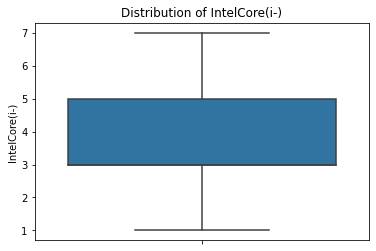

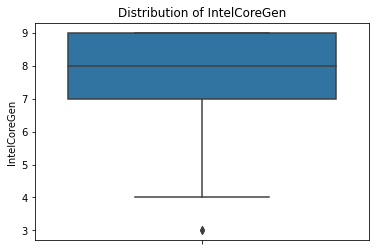

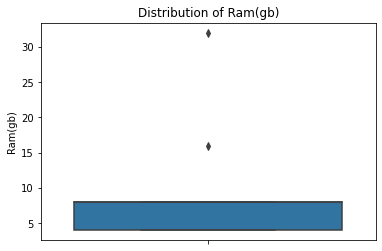

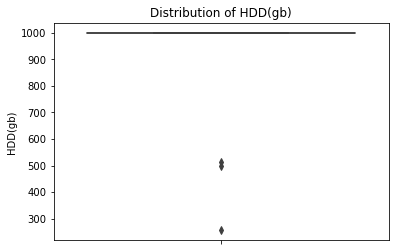

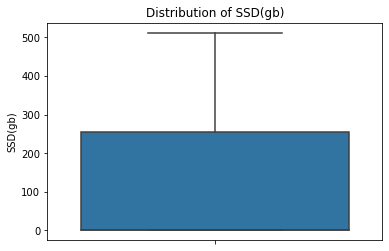

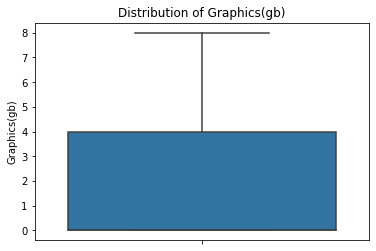

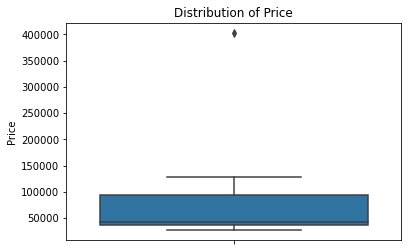

In [180]:
## Using a for loop to create the boxplot of various numerical attributes by calling the "outlier_func" function. 
for i in lap_t:
    outlier_func(i)

In [181]:
## From the above dataset we dont see any outlier.
## If we had outliers depending upon the use case we can consider a particular cutoff and remove them.
## Yet in practical world outliers are not removed as depending upon the business type those outliers might signify some important information.

## EDA

### Univariate Analysis.

In [182]:
lap_data.select_dtypes("int64").columns

Index(['IntelCore(i-)', 'IntelCoreGen', 'Ram(gb)', 'HDD(gb)', 'SSD(gb)',
       'Graphics(gb)', 'Price'],
      dtype='object')

In [183]:
## Performing Univariate Analysis on Numerical Attributes.

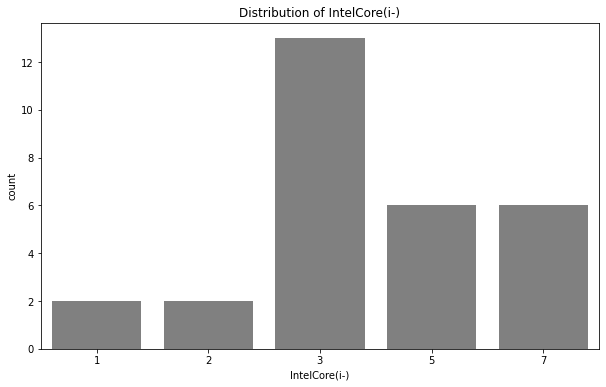

In [184]:
## Distribution of "IntelCore(i-)" attribute.
plt.figure(figsize=(10,6))
sns.countplot(data=lap_data, x='IntelCore(i-)', color='grey' )
plt.title("Distribution of IntelCore(i-)")
plt.show()

#### Inference:-

- From the above analysis we can observe that 'IntelCore(i-3)' has the highest count among all the other processor types.

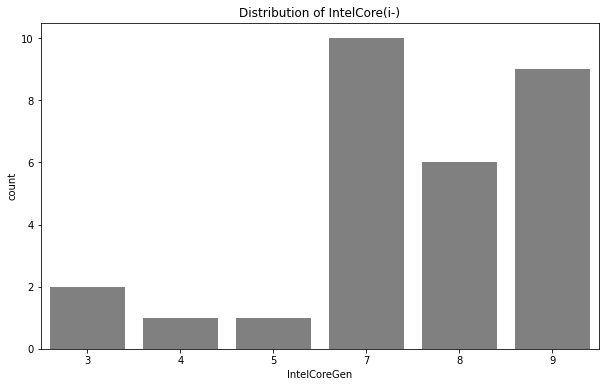

In [185]:
## Distribution of "IntelCoreGen" attribute.
plt.figure(figsize=(10,6))
sns.countplot(data=lap_data, x='IntelCoreGen', color='grey' )
plt.title("Distribution of IntelCore(i-)")
plt.show()

#### Inference:-

- From the above analysis we can observe that Generation 7 has the highest count among all the other Intel Core Generation types.
- The one with the second highest count is Generation 9.
- The Intel Core Generation with the lowest count is 4.

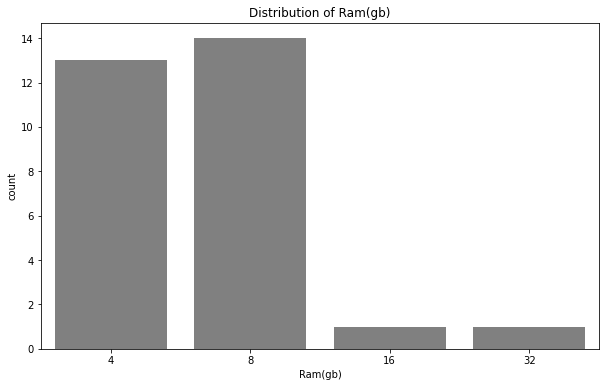

In [186]:
## Distribution of "Ram(gb)" attribute.
plt.figure(figsize=(10,6))
sns.countplot(data=lap_data, x='Ram(gb)', color='grey' )
plt.title("Distribution of Ram(gb)")
plt.show()

#### Inference:-

- From the above analysis we can observe that Ram with 8GB specs has the highest count.

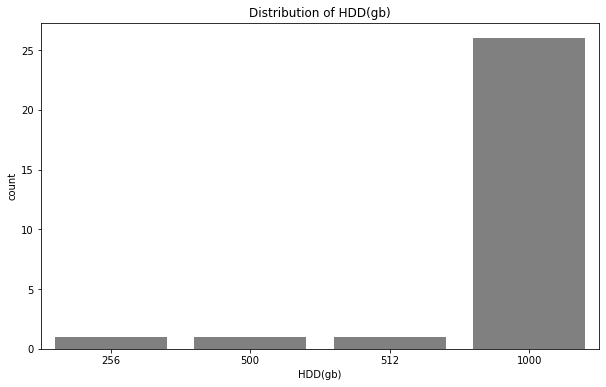

In [187]:
## Distribution of "HDD(gb)" attribute.
plt.figure(figsize=(10,6))
sns.countplot(data=lap_data, x='HDD(gb)', color='grey' )
plt.title("Distribution of HDD(gb)")
plt.show()

#### Inference:-
- From the above analysis we can observe that the HDD drives of 1000gb has the highest count.

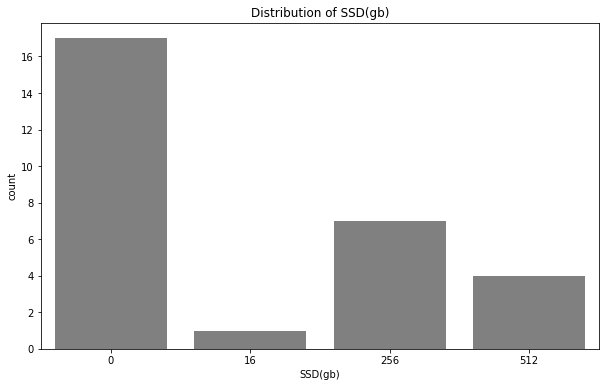

In [188]:
## Distribution of "SSD(gb)" attribute.
plt.figure(figsize=(10,6))
sns.countplot(data=lap_data, x='SSD(gb)', color='grey' )
plt.title("Distribution of SSD(gb)")
plt.show()

#### Inference:-
- From the above analysis we can observe that most specs dont include SSD drives hence the count is less.
- Out of the all the SSD drives which have an asigned space we can observe SSD drives with 256GB have highest count.

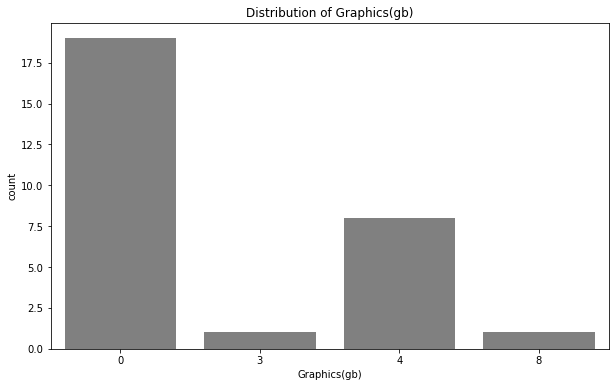

In [189]:
## Distribution of "Graphics(gb)" attribute.
plt.figure(figsize=(10,6))
sns.countplot(data=lap_data, x='Graphics(gb)', color='grey' )
plt.title("Distribution of Graphics(gb)")
plt.show()

#### Inference:-
- From the above analysis we can observe that most specs dont include Graphics hence the count is less.
- Out of the all the Grpaghic specs which have an asigned space we can observe Graphic spec with 4gb have the highest count.

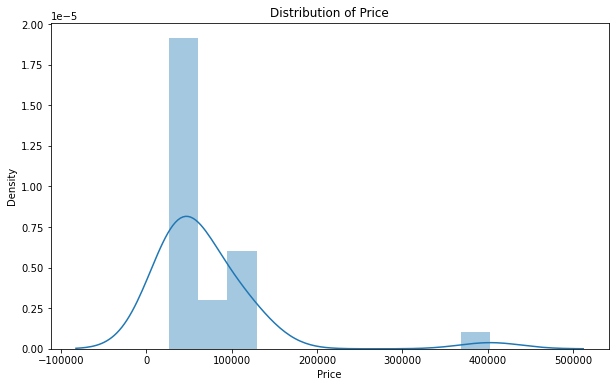

In [190]:
## Distribution of "Price" attribute.
plt.figure(figsize=(10,6))
sns.distplot((lap_data['Price']))
plt.title("Distribution of Price")
plt.show()

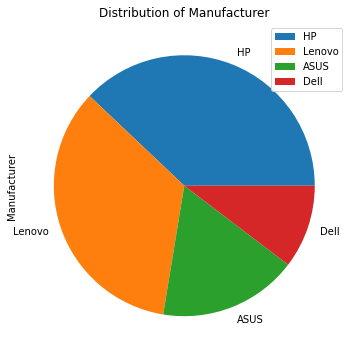

In [191]:
## Distribution of "Manufacturer" attribute.
plt.figure(figsize=(10,6))
lap_data['Manufacturer'].value_counts().plot.pie()
plt.title("Distribution of Manufacturer")
plt.legend()
plt.show()

#### Inference:-

- From the above analysis we can observe the approximate distribution of the manfacturers in the dataframe.

## Bivariate and Multivariate Analysis.

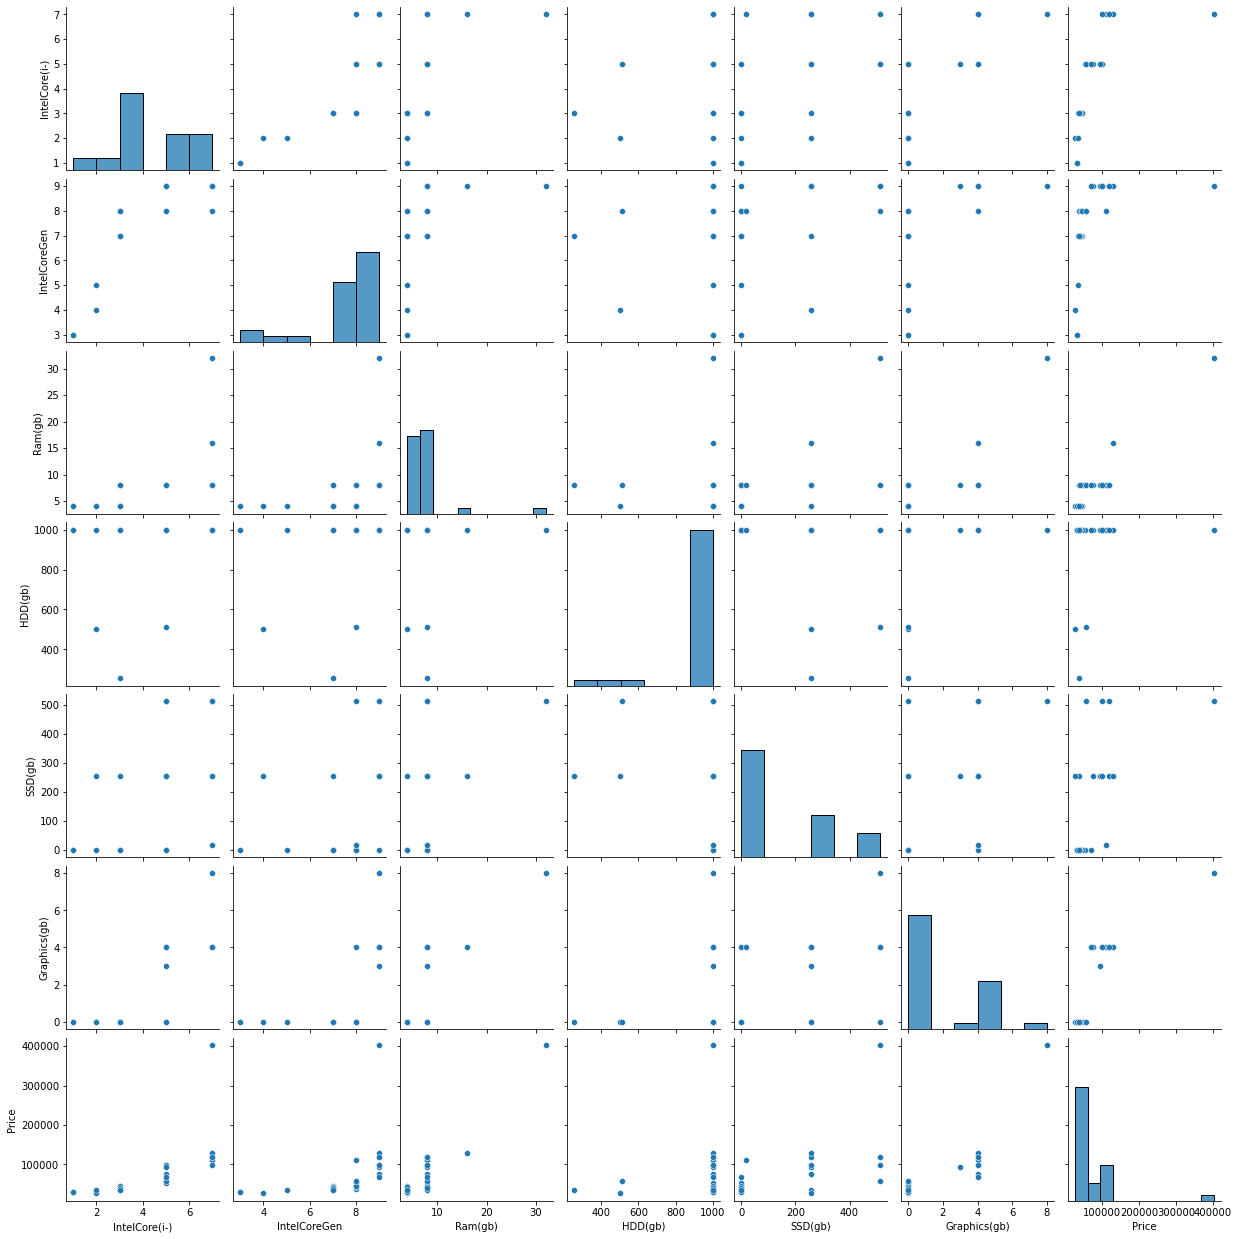

In [192]:
##### Using pair plot to analyze the effect of numerical attributes on each other.
sns.pairplot(lap_t)

In [196]:
label_encoder = preprocessing.LabelEncoder()
lap_data['Manufacturer'] = lap_data['Manufacturer'].astype('|S')
lap_data['Manufacturer'] = label_encoder.fit_transform(lap_data['Manufacturer'])

In [198]:
# checking vif
variables = lap_data[['Manufacturer','IntelCore(i-)', 'IntelCoreGen',
       'processing speed(GHz)', 'Ram(gb)', 'HDD(gb)', 'SSD(gb)',
       'Graphics(gb)', 'ScreenSize(inch)']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

vif

,VIF,Features
0,4.830255,Manufacturer
1,40.647852,IntelCore(i-)
2,74.128093,IntelCoreGen
3,37.604507,processing speed(GHz)
4,7.636092,Ram(gb)
5,65.612904,HDD(gb)
6,4.828394,SSD(gb)
7,9.230363,Graphics(gb)
8,110.209476,ScreenSize(inch)


In [199]:
## Removing the VIF values above 10

In [200]:
# now, we'll drop columns which have vif>10
lap_data = lap_data.drop(['IntelCore(i-)','IntelCoreGen','processing speed(GHz)','HDD(gb)','ScreenSize(inch)'], axis=1)

In [201]:
## Checking the dataframe post deletion.
lap_data.head()

,Manufacturer,Ram(gb),SSD(gb),Graphics(gb),Price
0,1,4,0,0,39057
1,1,4,0,0,45141
2,2,8,256,0,35999
3,0,4,0,0,39990
4,2,4,0,0,36263


<AxesSubplot:>

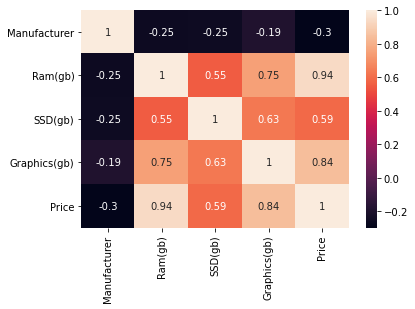

In [202]:
## Checking the heatmap
corr_data = lap_data.corr(method='pearson')
sns.heatmap(corr_data, annot=True)

#### Inference:- 

- We can observe all the factors that effects the Price attribute the most.

In [203]:
## Splitting the dataset into dependent attribut and independent attributes.
## Storing the target varibale in the 'y' variable.
y = lap_data.pop('Price')
## Storing the remaining varibale in the 'X' variable.
X = lap_data

In [204]:
## Splitting the dataset into Train and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  

In [205]:
## Applying Random Forest Model
regr = RandomForestRegressor(random_state=0)
regr.fit(X, y)

RandomForestRegressor(random_state=0)

In [206]:
## Making Prediction.
y_pred = regr.predict(X_test)

In [207]:
## R2 score of y-test and y-pred.
r2_score(y_test, y_pred)

0.9879177200463668